### Load data

In [1]:
import pandas as pd
import numpy as np
import pickle
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
#Load rf model
with open('/model/rf_model.pkl','rb') as f:
    rf_model = joblib.load(f)

In [3]:
#Load dataset
with open('/preprocessing/processed_data.pickle','rb') as f:
    preproc_data = pickle.load(f)

In [4]:
#Analyzed dataset
with open('/analysis/analyzed_data.pickle','rb') as f:
    analyzed_data = pickle.load(f)

In [5]:
cytokine_df = preproc_data['cytokine_data']
patient_meta = preproc_data['metadata'] 
patient_info = preproc_data['clinical']
shap_df = analyzed_data['shap_value']
embedding = analyzed_data['umap']
clusters = analyzed_data['cluster']

### Hierarchical dendrogram

In [6]:
patient_meta.index = patient_meta.Sample

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

label_colors_1 = {
   
    'sDP': 'red',
    'mDP': 'orange',
    'sRP': 'purple',
    'mRP': 'green',
}
label_colors_2 = {
   
    4.0: 'orange',
    5.0: 'orange',
    7.0: 'red',
    8.0:'red'
}
label_colors_3 = {
    'DP' :'red',
    'RP' : 'blue',
}

col_colors_1 = patient_meta.Detailed_PPG.map(label_colors_1)
col_colors_2 = patient_meta.Severity.map(label_colors_2)
col_colors_3 = patient_meta.PPG.map(label_colors_3)
col_colors = pd.DataFrame({'PPGs': col_colors_1,'severity':col_colors_2,})
legend_elements_1 = [Patch(facecolor=color, label=label) for label, color in label_colors_1.items()]
legend_elements_2 = [Patch(facecolor=color, label=label) for label, color in label_colors_2.items()]

In [8]:
from sklearn.preprocessing import StandardScaler
df = shap_df[~shap_df.index.str.contains('Healthy')]
df_filtered = df.loc[:, (df != 0).any(axis=0)]

scaler = StandardScaler()

try:
    df_scaled = scaler.fit_transform(df_filtered)
    df_scaled = pd.DataFrame(df_scaled, index=df_filtered.index, columns=df_filtered.columns)
except FloatingPointError as e:
    print(f"Error during scaling: {e}")


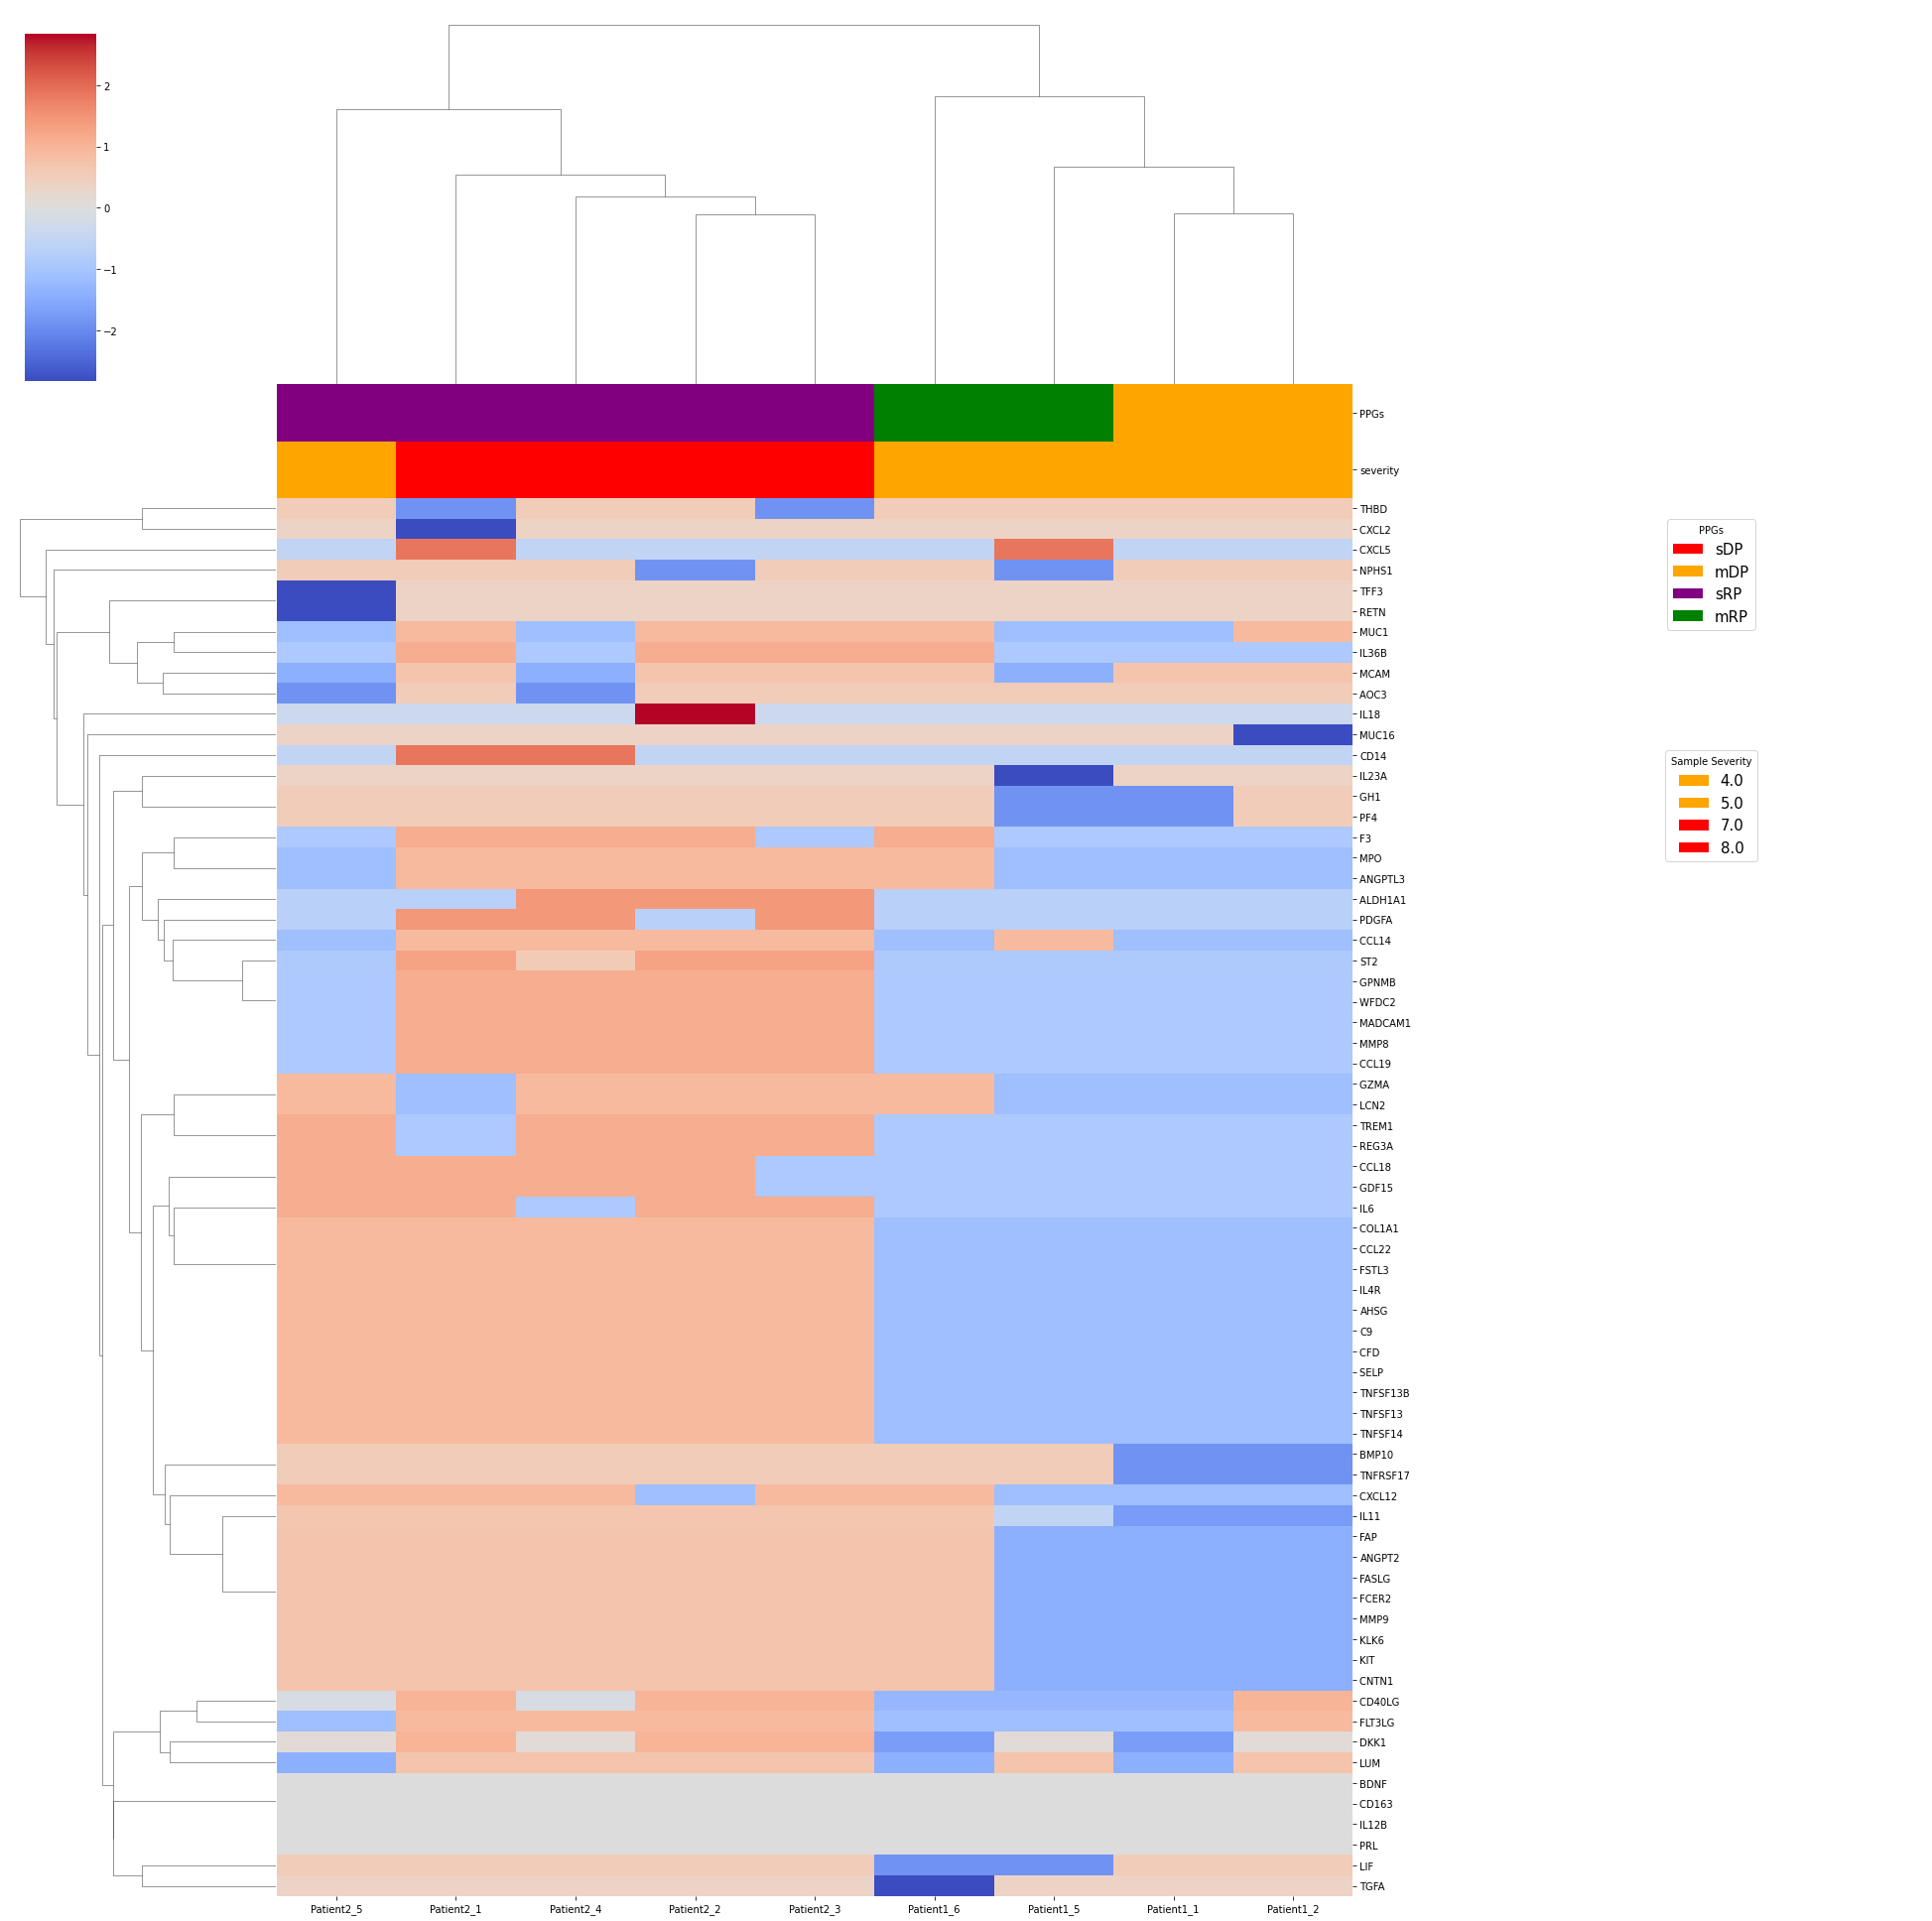

In [9]:
g= sns.clustermap(df_scaled.T, cmap='coolwarm', figsize=(20, 27), col_colors=col_colors)

legend_ax_1 = g.fig.add_axes([1.05, 0.60, 0.3, 0.2])
legend_ax_2 = g.fig.add_axes([1.05, 0.48, 0.3, 0.2])



legend_ax_1.legend(handles=legend_elements_1, title="PPGs", loc="center", fontsize = 15)
legend_ax_1.axis('off')  # Turn off the axis

legend_ax_2.legend(handles=legend_elements_2, title="Sample Severity", loc="center", fontsize = 15)
legend_ax_2.axis('off')  # Turn off the axis



plt.show()


### UMAP scatter Plot

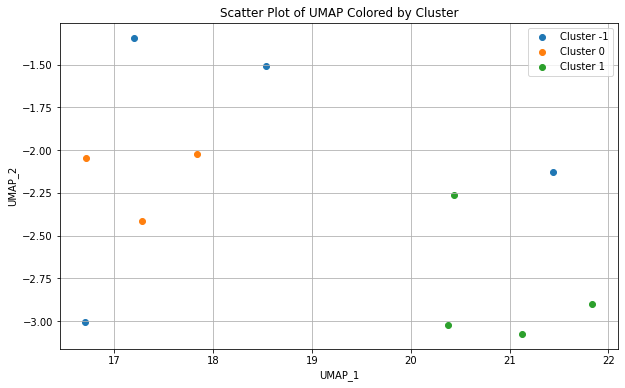

In [10]:
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(clusters)

for cluster in unique_clusters:
    idx = clusters == cluster
    plt.scatter(embedding[idx, 0], embedding[idx, 1], label=f'Cluster {cluster}')

plt.title('Scatter Plot of UMAP Colored by Cluster')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.legend()
plt.grid(True)
plt.show()